# Evaluating Machine Learning Algorithms - Extended Examples

## Preparations

* Download [Anaconda with Python 3.6](https://www.anaconda.com/download) to install a nearly complete Python enviroment for data science projects
* Install [Keras: The Python Deep Learning Library](https://keras.io/) and other missing packages with the following command: ```conda install keras```
* Start your local Jupyter instance with ```jupyter notebook```

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# the import statements load differnt Python packages that we need for the tutorial
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")

# ML imports
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


http://yann.lecun.com/exdb/mnist/   

# TREC ist auch NIST

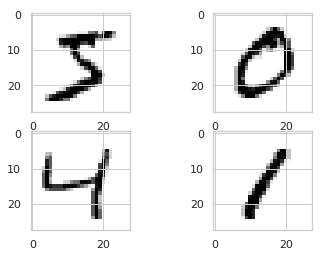

In [2]:
# load (download if needed) the MNIST dataset of handwritten numbers
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale images
plt.subplot(221)
# -1 inverts the image because of aesthetical reasons
plt.imshow(X_train[0]*-1, cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1]*-1, cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2]*-1, cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3]*-1, cmap=plt.get_cmap('gray'))
# show the plot

plt.savefig("test.pdf",format="pdf")
plt.show()

# was genau drückt baseline error aus?
- > fehler bezogen auf accuracy

In [72]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 36s - loss: 0.2797 - acc: 0.9205 - val_loss: 0.1411 - val_acc: 0.9576
Epoch 2/10
 - 37s - loss: 0.1116 - acc: 0.9675 - val_loss: 0.0922 - val_acc: 0.9713
Epoch 3/10
 - 37s - loss: 0.0717 - acc: 0.9798 - val_loss: 0.0790 - val_acc: 0.9764
Epoch 4/10
 - 44s - loss: 0.0502 - acc: 0.9861 - val_loss: 0.0749 - val_acc: 0.9770
Epoch 5/10
 - 43s - loss: 0.0369 - acc: 0.9895 - val_loss: 0.0665 - val_acc: 0.9791
Epoch 6/10
 - 45s - loss: 0.0266 - acc: 0.9930 - val_loss: 0.0627 - val_acc: 0.9802
Epoch 7/10
 - 37s - loss: 0.0207 - acc: 0.9946 - val_loss: 0.0632 - val_acc: 0.9807
Epoch 8/10
 - 36s - loss: 0.0139 - acc: 0.9971 - val_loss: 0.0621 - val_acc: 0.9807
Epoch 9/10
 - 36s - loss: 0.0105 - acc: 0.9979 - val_loss: 0.0585 - val_acc: 0.9817
Epoch 10/10
 - 37s - loss: 0.0078 - acc: 0.9986 - val_loss: 0.0577 - val_acc: 0.9819
Baseline Error: 1.81%


## Overfitting

In [45]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

steps=[18,100,1000,5000,10000,20000,30000,40000,50000]
errorPerStep=dict()

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

for step in steps:
    # load data
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train=X_train[0:step]
    y_train=y_train[0:step]

    # flatten 28*28 images to a 784 vector for each image
    num_pixels = X_train.shape[1] * X_train.shape[2]
    X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

    # normalize inputs from 0-255 to 0-1
    X_train = X_train / 255
    X_test = X_test / 255

    # one hot encode outputs
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]



    # build the model
    model = baseline_model()
    # Fit the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Baseline Error: %.2f%%" % (100-scores[1]*100))
    errorPerStep[step]=(100-scores[1]*100)

Train on 18 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 2.2611 - acc: 0.1111 - val_loss: 2.1296 - val_acc: 0.2652
Epoch 2/10
 - 2s - loss: 1.5880 - acc: 0.7778 - val_loss: 1.9998 - val_acc: 0.3323
Epoch 3/10
 - 2s - loss: 1.0800 - acc: 0.8889 - val_loss: 1.8835 - val_acc: 0.3837
Epoch 4/10
 - 3s - loss: 0.7079 - acc: 1.0000 - val_loss: 1.7821 - val_acc: 0.4226
Epoch 5/10
 - 3s - loss: 0.4616 - acc: 1.0000 - val_loss: 1.6875 - val_acc: 0.4610
Epoch 6/10
 - 3s - loss: 0.2867 - acc: 1.0000 - val_loss: 1.6128 - val_acc: 0.4902
Epoch 7/10
 - 3s - loss: 0.1805 - acc: 1.0000 - val_loss: 1.5550 - val_acc: 0.5079
Epoch 8/10
 - 3s - loss: 0.1149 - acc: 1.0000 - val_loss: 1.5129 - val_acc: 0.5219
Epoch 9/10
 - 3s - loss: 0.0741 - acc: 1.0000 - val_loss: 1.4853 - val_acc: 0.5301
Epoch 10/10
 - 3s - loss: 0.0490 - acc: 1.0000 - val_loss: 1.4698 - val_acc: 0.5355
Baseline Error: 46.45%
Train on 100 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 2.4231 - acc: 0.0500 - val

In [70]:
print(scores)

[0.06385582257292118, 0.9805]


In [54]:
print(errorPerStep)
x=[]
y=[]
for e in errorPerStep:
    x.append(e)
    y.append(errorPerStep[e])


{18: 46.45, 100: 33.22, 1000: 11.590000000000003, 5000: 6.1200000000000045, 10000: 4.299999999999997, 20000: 2.730000000000004, 30000: 2.1200000000000045, 40000: 2.1899999999999977, 50000: 1.9500000000000028}


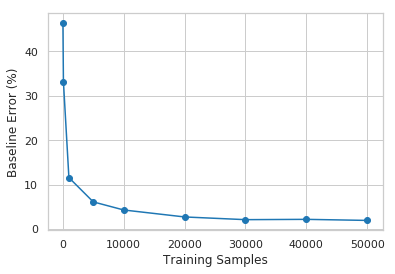

In [62]:
plt.xlabel("Training Samples")
plt.ylabel("Baseline Error (%)")
plt.plot(x,y,'o-')
plt.savefig("test.pdf",format="pdf")

NameError: name 'model' is not defined

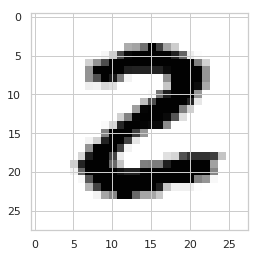

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#print(X_train.shape)
test_im = X_train[25]
#print(test_im.shape)
plt.imshow(test_im.reshape(28,28)*-1, cmap=plt.get_cmap('gray'), interpolation='none')

num_pixels = X_train.shape[1] * X_train.shape[2]
# as we are dealing with only one image, we have to restrict the array to a 1D * 784
test_im = test_im.reshape(1, num_pixels).astype('float32')
#test_im = test_im.reshape(test_im.shape[0], 1).astype('float32')


r=model.predict(test_im)

itemindex = numpy.where(r[0]==1)
print("The model predicts: %i"%itemindex[0])

## Cross-Validation
im Naive-Bayes-Beispiel